# 1. Read Dataset

In [2]:
from sklearn.datasets import load_iris
data=load_iris()

# 2. Feature Exttraction

In [3]:
x=data.data[:,:2]
y=data.target

# 3. Model Building

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
import joblib
joblib.dump(knc,"New_KNear_C.pickle")
Load_KNear_C=joblib.load("New_KNear_C.pickle")

# 4. Model Evaluation

In [9]:
y_pred=Load_KNear_C.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 2, 2, 0, 0])

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))

0.16666666666666666
0.408248290463863
0.16666666666666666


# 5. Result Visuaisation

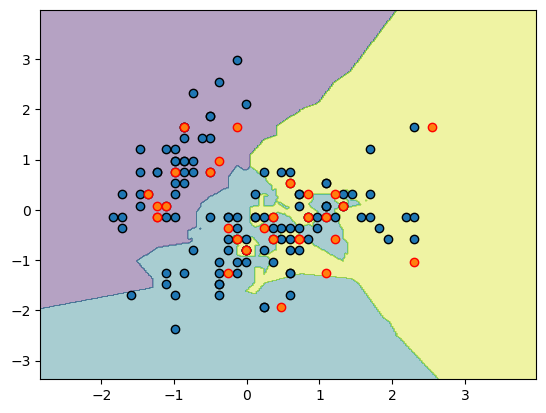

In [11]:
import matplotlib.pyplot as plt

x_min,x_max=x_train[:,0].min()-1 , x_train[:,1].max()+1
y_min,y_max=x_train[:,1].min()-1 , x_train[:,1].max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
z=Load_KNear_C.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha=0.4)
plt.scatter(x_train[:,0],x_train[:,1],edgecolors="black")
plt.scatter(x_test[:,0],x_test[:,1],edgecolors="red")
plt.show()